Data Source: https://www.kaggle.com/c/titanic

# IMPORT LIBRARIES AND DATASETS

In [52]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Read the data using pandas dataframe
df = pd.read_csv('titanic.csv')

In [54]:
# Show the data head!
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


# PERFORM DATA VISUALIZATION

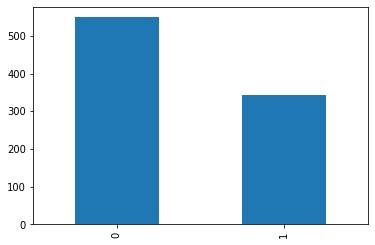

In [56]:
# Let's count the number of survivors and non-survivors
df['Survived'].value_counts().plot.bar();

In [57]:
survived_df = df[df['Survived'] == 1]
no_survived_df = df[df['Survived'] == 0]

In [58]:
# Count the survived and deceased 
print("Total =", len(df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", 1. * len(survived_df) / len(df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(df) * 100.0, "%")
         

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


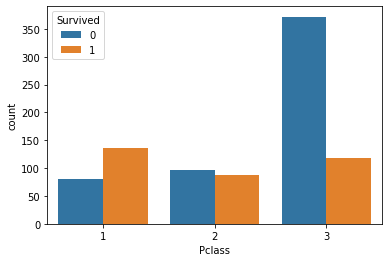

In [59]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival
sns.countplot(data = df, x='Pclass', hue='Survived');

- **Do you have a higher chance of survival if you have zero or one sibling?**

In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

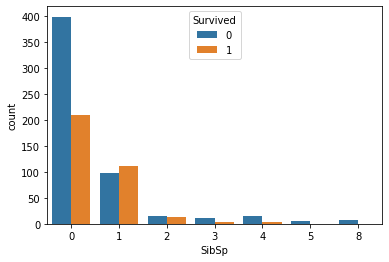

In [61]:
sns.countplot(data=df, x='SibSp', hue='Survived');

<AxesSubplot:xlabel='Parch', ylabel='count'>

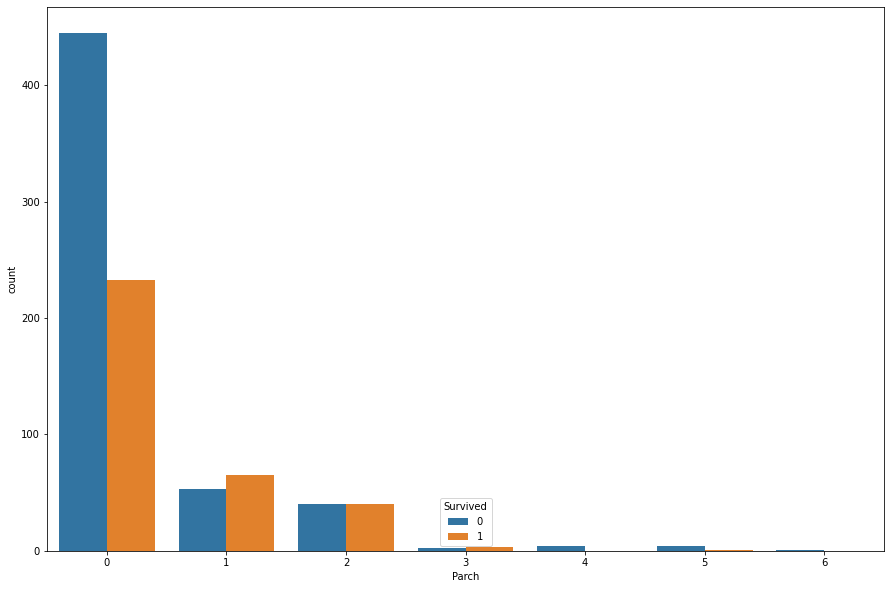

In [62]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize = [15, 10])
sns.countplot(data=df, x='Parch', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

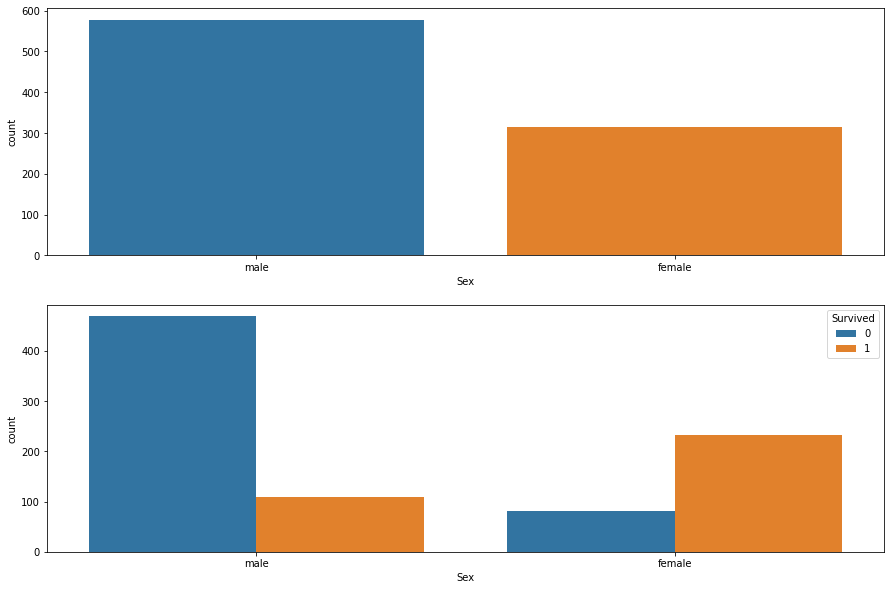

In [63]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Sex', data = df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = df)

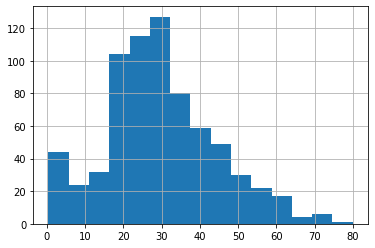

In [64]:
# Age Histogram 
df['Age'].hist(bins=15);

- **Plot the histogram for the "Fare" column**

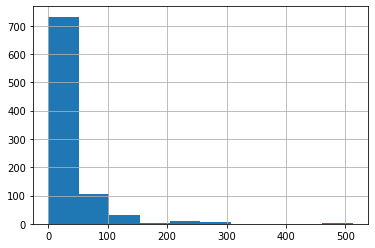

In [65]:
df['Fare'].hist(bins=10);

#  PERFORM DATA CLEANING AND FEATURE ENGINEERING

<AxesSubplot:>

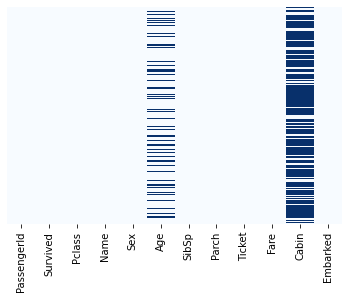

In [66]:
# Let's explore which dataset is missing
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [67]:
# Let's drop the cabin coloumn and test with inplace = true and false
df.drop(columns='Cabin', inplace=True)

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [69]:
# Let's drop the embarked, Ticket, passengerID, and Name as well
df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [70]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<AxesSubplot:>

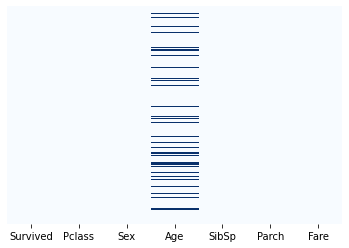

In [71]:
# Let's view the data one more time!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


<AxesSubplot:xlabel='Sex', ylabel='Age'>

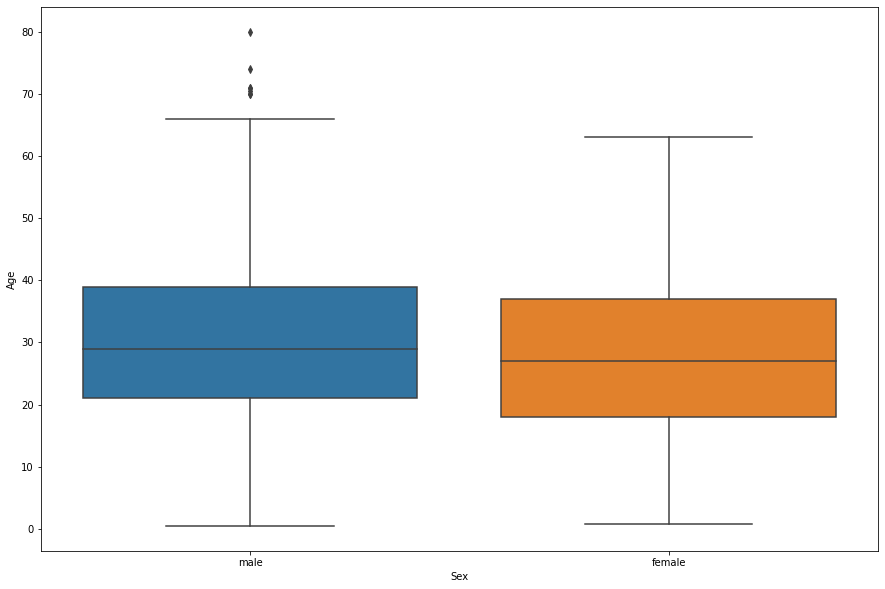

In [72]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Sex', y = 'Age', data = df)

In [73]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [74]:
df['Age'] = df[['Age','Sex']].apply(Fill_Age, axis=1)

<AxesSubplot:>

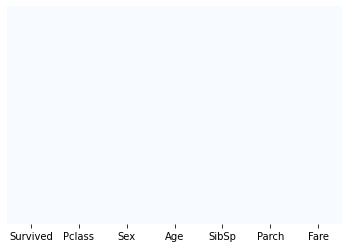

In [75]:
# Let's view the data one more time!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [76]:
# You just need one column only to represent male or female
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [77]:
male = pd.get_dummies(df['Sex'], drop_first = True)


In [78]:
# first let's drop the embarked and sex 
df.drop(['Sex'], axis = 1, inplace = True)

In [79]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [80]:
# Now let's add the encoded column male again
df = pd.concat([df, male], axis = 1)

In [81]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [82]:
#Let's drop the target coloumn before we do train test split
X = df.drop('Survived', axis = 1).values
y = df['Survived'].values


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Scale the features

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# TRAIN LOGISTIC REGRESSION CLASSIFIER MODEL

In [84]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight='balanced', max_iter=1000).fit(X_train, y_train)

# ASSESS TRAINED MODEL PERFORMANCE

In [85]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1])

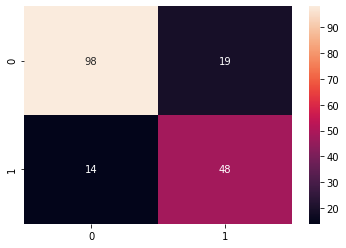

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d");

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       117
           1       0.72      0.77      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



#  A Naive Bayes Classifier 

In [88]:
from sklearn.naive_bayes import BernoulliNB

In [89]:
nb = BernoulliNB(alpha=1, )
y_pred = nb.fit(X_train, y_train).predict(X_test)

<AxesSubplot:>

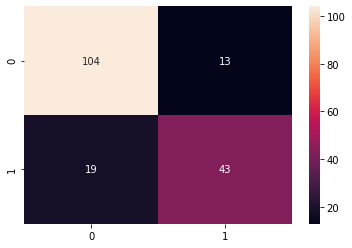

In [90]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [99]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

<AxesSubplot:>

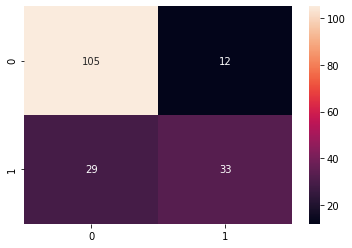

In [100]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = "d")

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179

